# PCA and SVD application fo gene expression data

### Making Toy Data

In [38]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16,16]

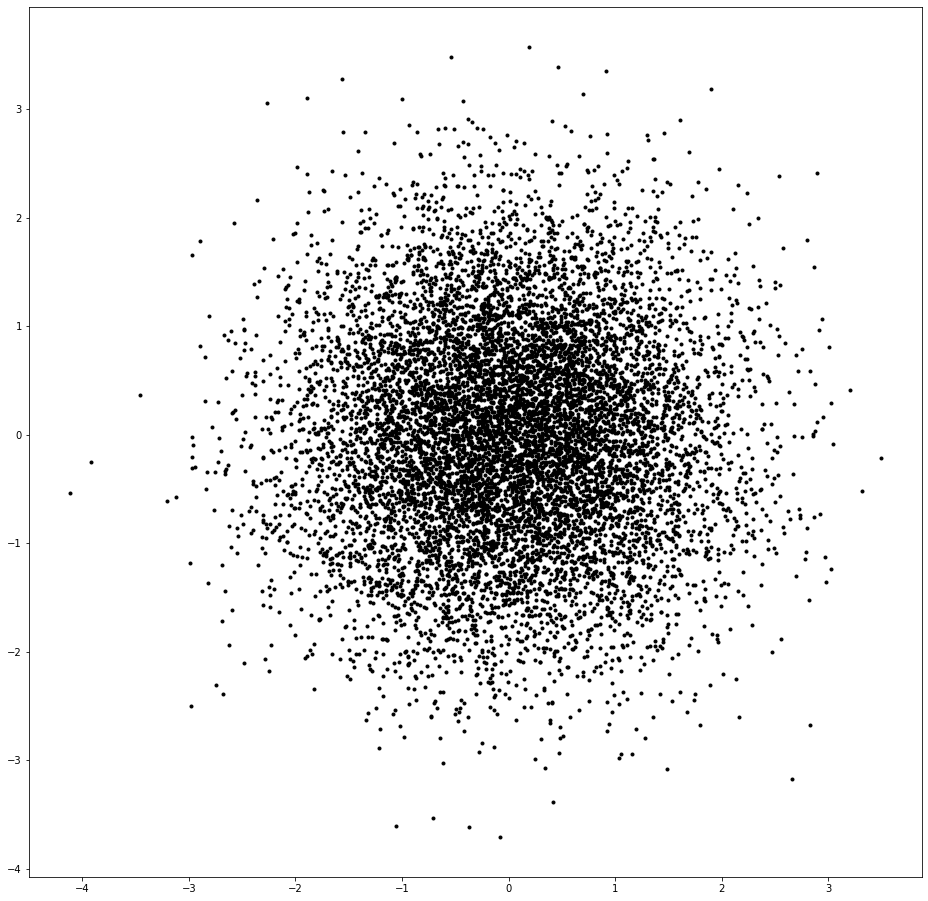

In [39]:
#Create 2, 10000 array of data pts with norm distro of variance

nPoints = 10000
X = np.random.randn(2, nPoints)
plt.plot(X[0,:], X[1,:], '.', color = 'k')

(-10.0, 10.0)

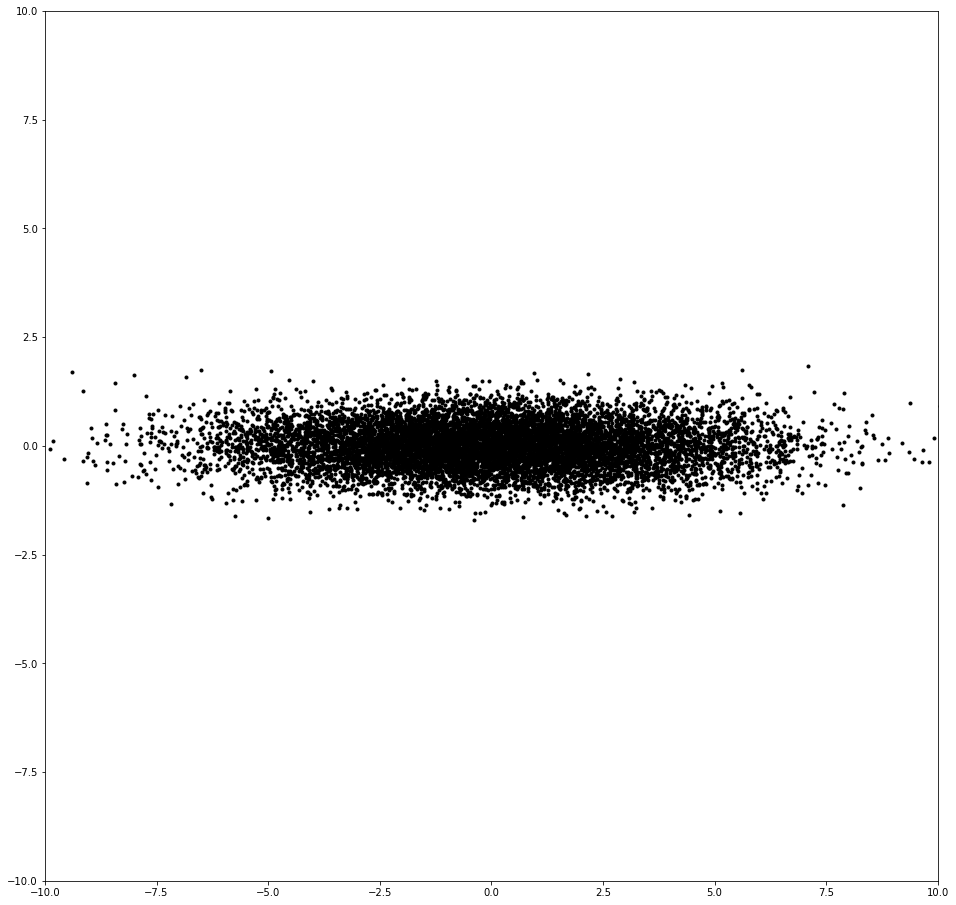

In [40]:
#Squish in Y and expand in X direction
sig = np.array([3,0.5])

X = np.diag(sig) @ np.random.randn(2, nPoints)

plt.plot(X[0,:], X[1,:], '.', color = 'k')
plt.xlim((-10,10))
plt.ylim((-10,10))

(-10.0, 10.0)

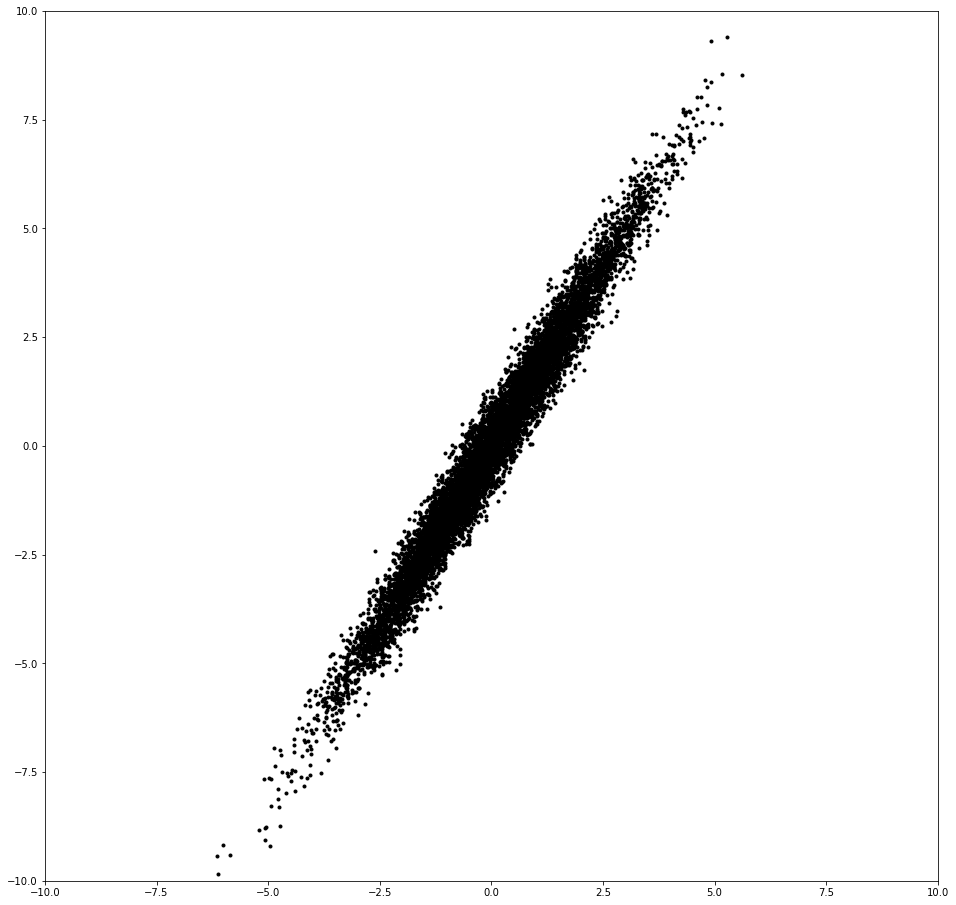

In [41]:
#Rotation matrix; Will rotate matrix by theta
#Creates hidden natural axis of variance in toy data
theta = np.pi/3
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), -np.cos(theta)]])
X = R @ np.diag(sig) @ np.random.randn(2, nPoints)

plt.plot(X[0,:], X[1,:], '.', color = 'k')
plt.xlim((-10,10))
plt.ylim((-10,10))

(-10.0, 10.0)

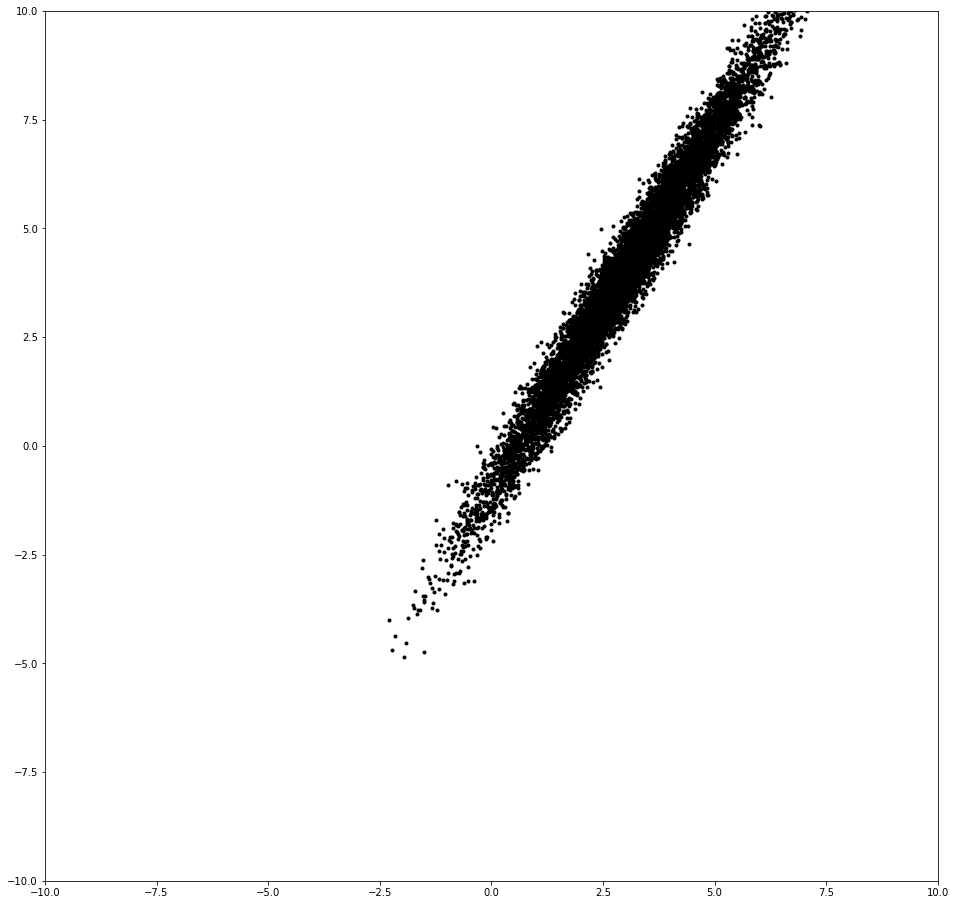

In [42]:
# Off-centering data
center = np.array([3,4])
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(center) @np.ones((2, nPoints))

plt.plot(X[0,:], X[1,:], '.', color = 'k')
plt.xlim((-10,10))
plt.ylim((-10,10))

## PCA
### First Mean Center the Data

(-10.0, 10.0)

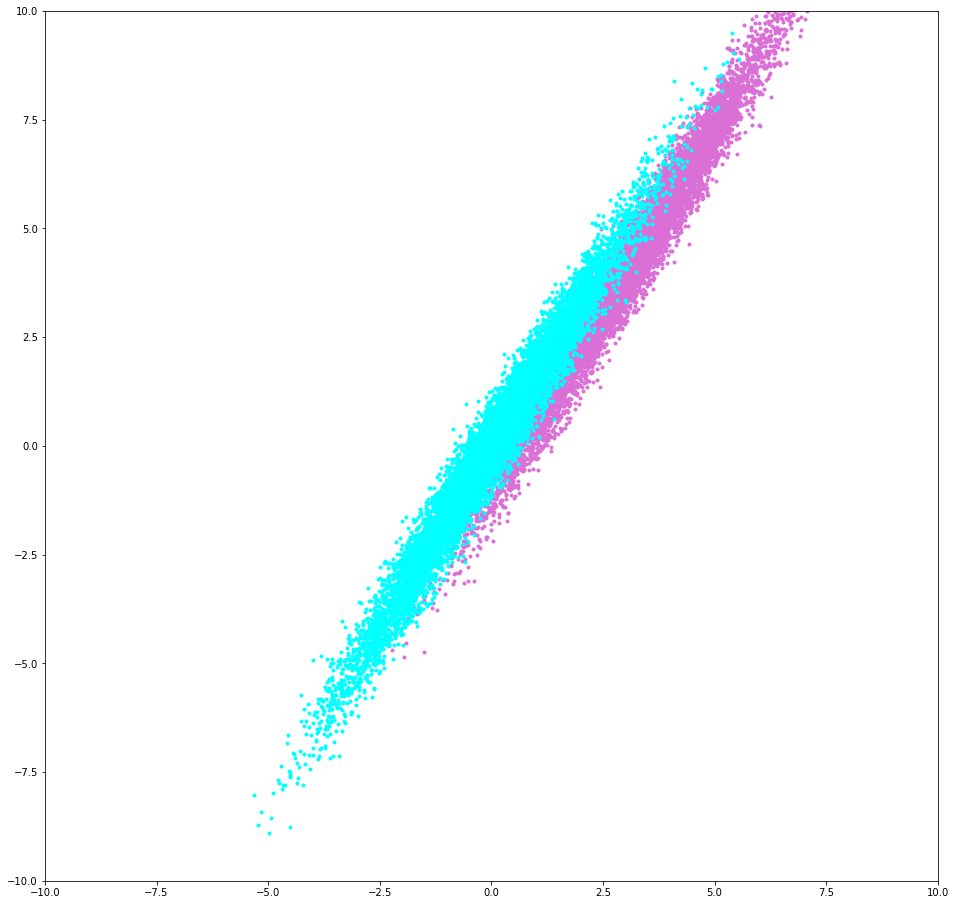

In [43]:
Y = X - np.mean(X, axis = 1).reshape(2,1)

plt.plot(X[0,:], X[1,:], '.', color = 'orchid')
plt.plot(Y[0,:], Y[1,:], '.', color = 'aqua')
plt.xlim((-10,10))
plt.ylim((-10,10))

### Find Covariance Matrix

In [44]:
C = np.cov(Y)
C

array([[2.43097633, 4.00519276],
       [4.00519276, 6.82449897]])

### Find Eigenvalues and Eigenvectors 

In [45]:
evals, evecs = np.linalg.eig(C) #Warning does not provide output sorted by eigenvalue

idx = evals.argsort()[::-1]

evals = evals[idx]
evecs = evecs[:,idx] #Eigenvectors are in the columns (this sorts them by eigvalues)

print("PC1 = ", evecs[:,0], 'PC2 = ', evecs[:,1])
print("Lambda1 = ", evals[0], "Lambda2 = ", evals[1])

PC1 =  [-0.5094634  -0.86049233] PC2 =  [-0.86049233  0.5094634 ]
Lambda1 =  9.195814849626016 Lambda2 =  0.059660445842061094


(-10.0, 10.0)

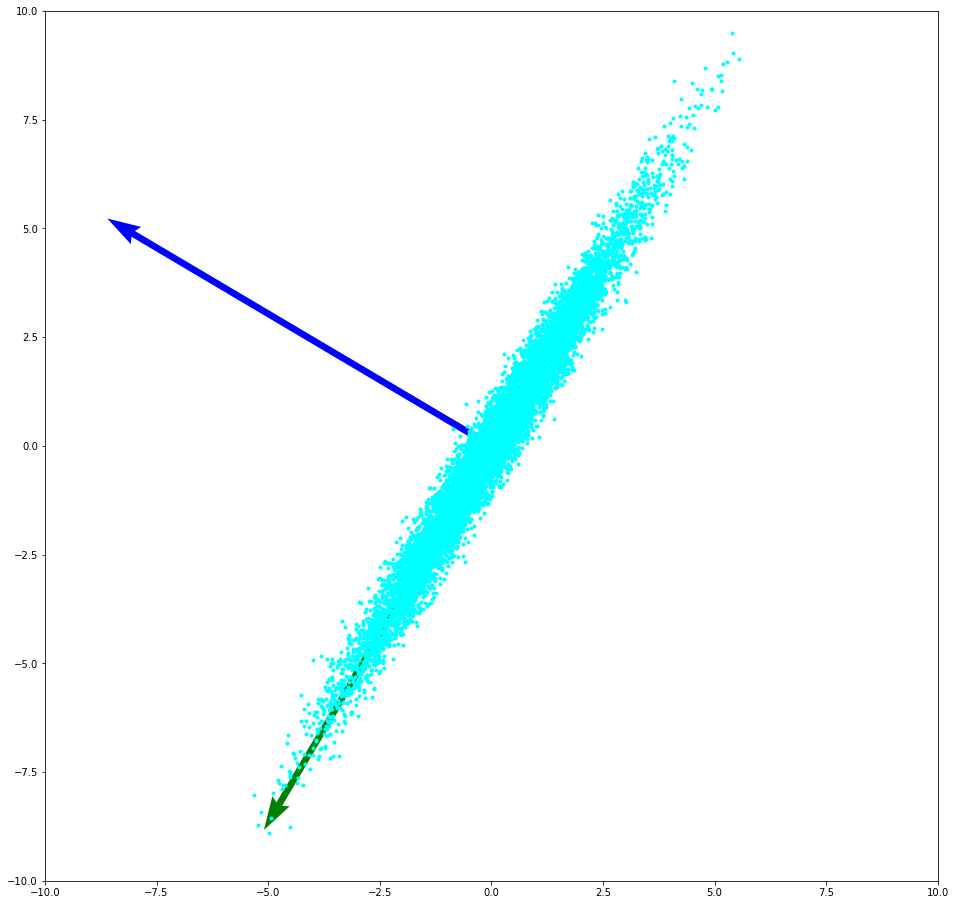

In [46]:
#Using quiver function to plot PCs
origin = np.zeros((2,2))
plt.quiver(origin[:,0], origin[:,1], evecs[:,0], evecs[:,1], color = ['g', 'b'], scale = 2)
plt.plot(Y[0,:], Y[1,:], '.', color = 'aqua')
plt.xlim((-10,10))
plt.ylim((-10,10))

### Reproject data back onto Principal Components

(-10.0, 10.0)

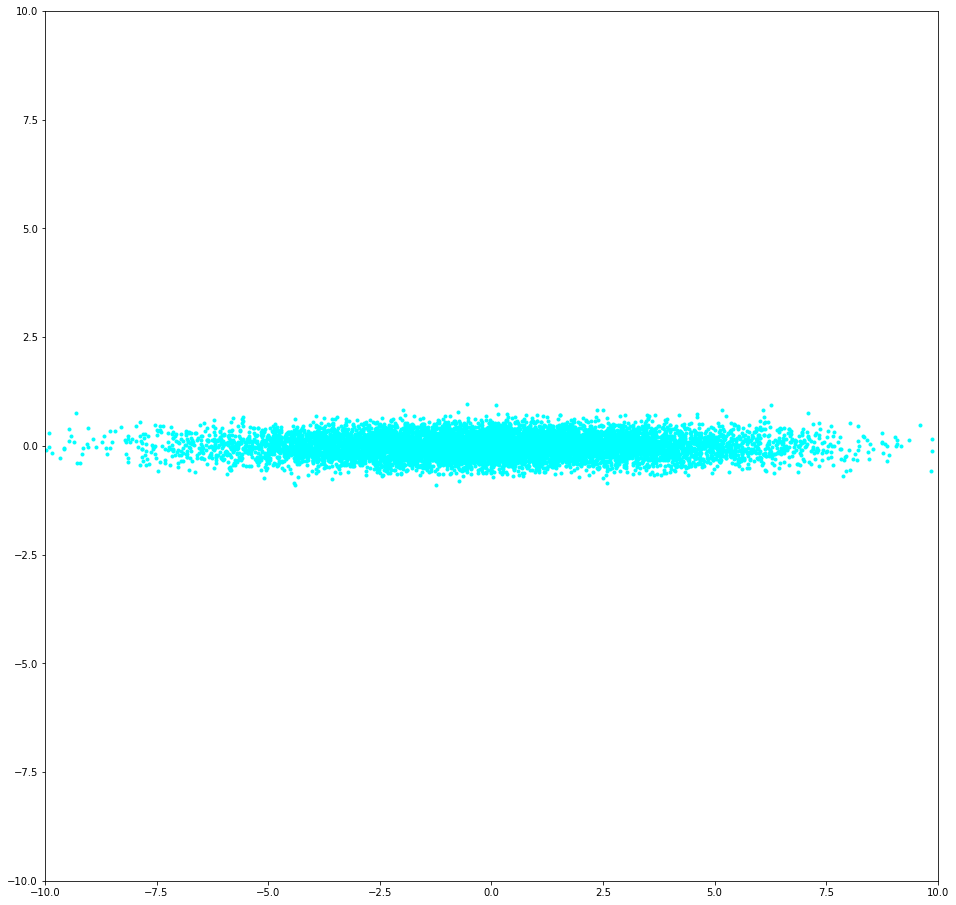

In [47]:
Y_reproj = np.transpose(evecs) @ Y
plt.plot(Y_reproj[0,:], Y_reproj[1,:], '.', color = 'aqua')
plt.xlim((-10,10))
plt.ylim((-10,10))

### Showing SVD equivalencs

In [48]:
U,S,VT = np.linalg.svd(C, full_matrices = True)

print("Ucol1 = ", U[:,0], "Ucol2 = ", U[:,1])
print("PC1 = ", evecs[:,0], 'PC2 = ', evecs[:,1])

Ucol1 =  [-0.5094634  -0.86049233] Ucol2 =  [-0.86049233  0.5094634 ]
PC1 =  [-0.5094634  -0.86049233] PC2 =  [-0.86049233  0.5094634 ]


In [49]:
print("S1 = ", S[0], "S2 = ", S[1])
print("Lambda1 = ", evals[0], "Lambda2 = ", evals[1])

S1 =  9.195814849626014 S2 =  0.05966044584206172
Lambda1 =  9.195814849626016 Lambda2 =  0.059660445842061094


## Dimension Reduction (compression by reprojections)

(-10.0, 10.0)

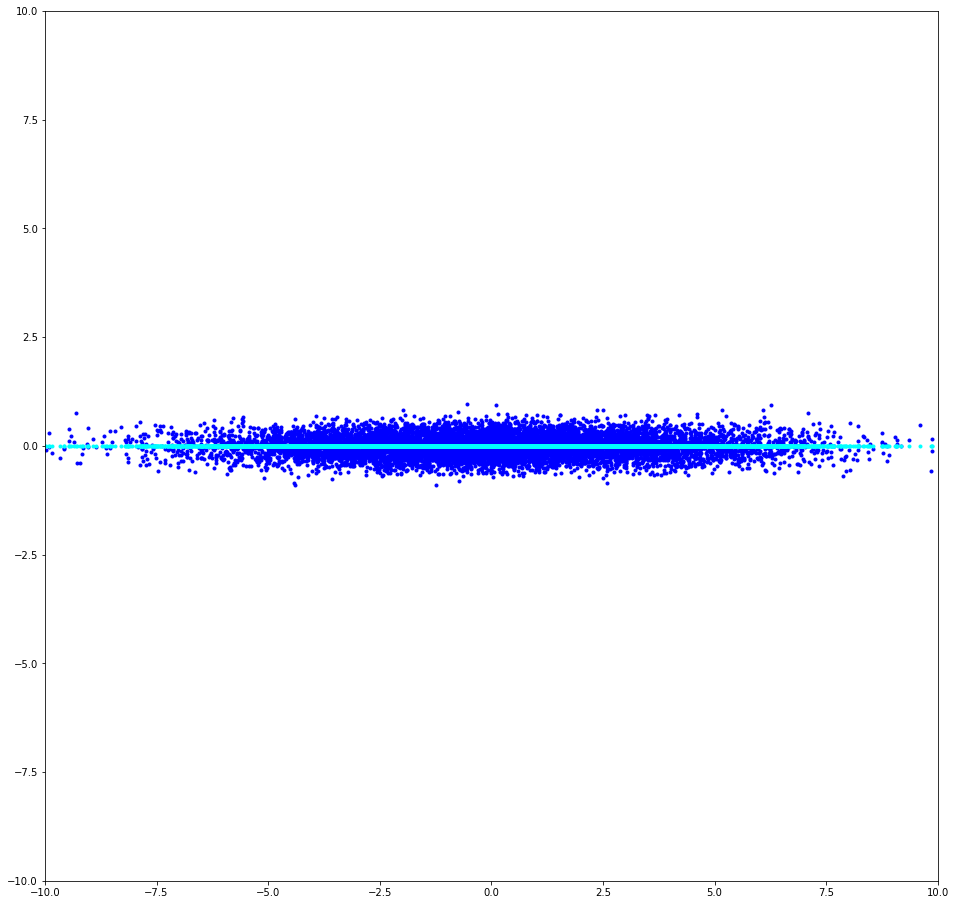

In [50]:
evecs_rd = evecs
evecs_rd[:,1] = 0

Y_approx = np.transpose(Y.transpose()@evecs_rd)
plt.plot(Y_reproj[0,:], Y_reproj[1,:], '.', color = 'b')
plt.plot(Y_approx[0,:], Y_approx[1,:], '.', color = 'aqua')
plt.xlim((-10,10))
plt.ylim((-10,10))

### Data compression on natural axis

(-10.0, 10.0)

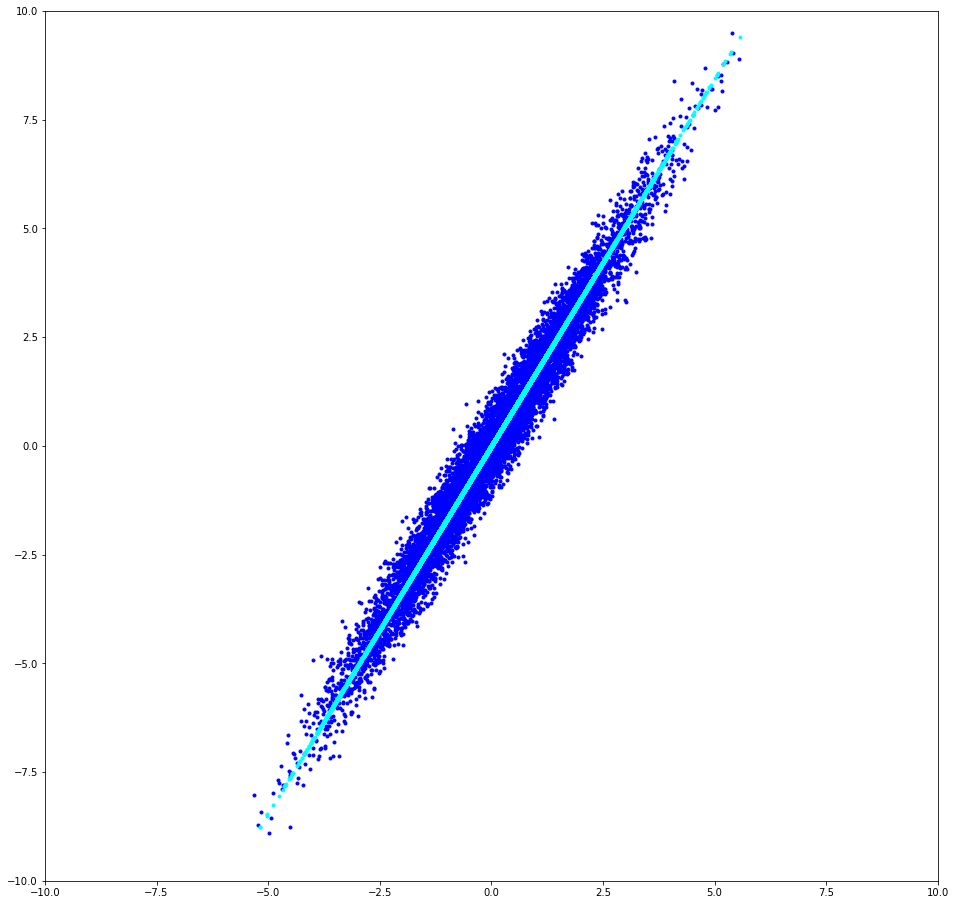

In [51]:
Y_approx = evecs_rd @ evecs_rd.transpose() @ Y
plt.plot(Y[0,:], Y[1,:], '.', color = 'b')
plt.plot(Y_approx[0,:], Y_approx[1,:], '.', color = 'aqua')
plt.xlim((-10,10))
plt.ylim((-10,10))

## SVD

(-10.0, 10.0)

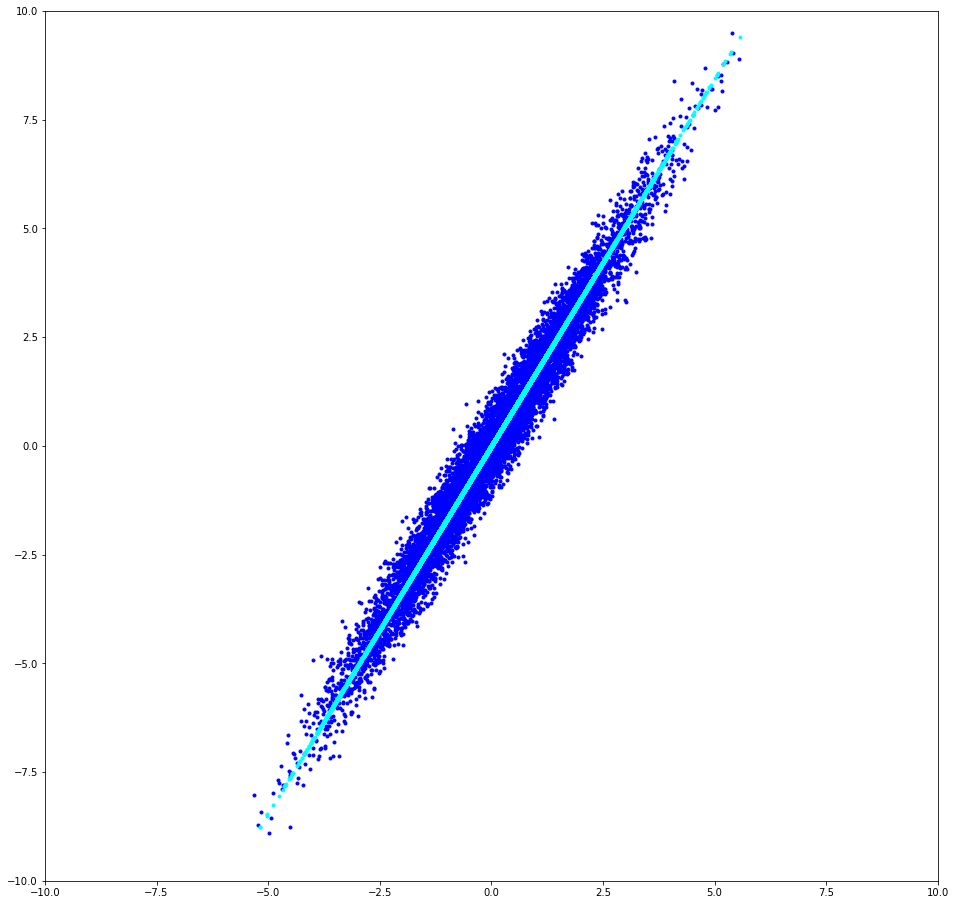

In [52]:
U,S,VT = np.linalg.svd(Y, full_matrices = True)
n = 1

U_rd = U[:,:n]
D_rd = np.diag(S[:n])
VT_rd = VT[:n,:]

Y_approx = U_rd @ D_rd @ VT_rd

plt.plot(Y[0,:], Y[1,:], '.', color = 'b')
plt.plot(Y_approx[0,:], Y_approx[1,:], '.', color = 'aqua')
plt.xlim((-10,10))
plt.ylim((-10,10))